<a href="https://colab.research.google.com/github/Devansh-84/portfolio-optimization/blob/main/IMPROVE_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

In [2]:
# Fetch data for a stock (e.g., Apple Inc. - AAPL) from Yahoo Finance
ticker_symbol = 'RELIANCE.NS'
stock_data = yf.download(ticker_symbol, start='2010-01-01', end='2024-01-28')
stock_data.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS,RELIANCE.NS
Date,,,,,
2024-01-18,1358.695801,1361.725216,1342.108824,1342.257834,10279438
2024-01-19,1358.199097,1366.691304,1349.806310,1366.691304,10422704
2024-01-23,1319.587158,1362.470128,1313.603014,1362.470128,20055420
2024-01-24,1334.783691,1340.370638,1314.968702,1326.192184,21919128
2024-01-25,1343.921387,1354.921537,1326.167311,1333.864882,11808872


In [3]:
# Preprocess the data
data = stock_data['Close'].values.reshape(-1, 1)  # Convert to 2D array for scaling
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

In [4]:

# Create the training and testing datasets
train_data = scaled_data[:int(len(scaled_data) * 0.8)]
test_data = scaled_data[int(len(scaled_data) * 0.8):]

def create_dataset(dataset, time_step=1):
    X, y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)



In [5]:
# Reshape input to be [samples, time steps, features] for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [7]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from keras.regularizers import l2
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping

# Define the model with increased complexity and regularization
model = Sequential()
model.add(LSTM(units=128, return_sequences=True, input_shape=(X_train.shape[1], 1), kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(LSTM(units=64, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(LSTM(units=32, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(units=1))


# Compile the model with RMSprop optimizer and adjusted learning rate
model.compile(loss='mse', optimizer=RMSprop(learning_rate=0.0005), metrics=['mean_absolute_error'])


# Add early stopping to prevent overfitting
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 128)          66560     
                                                                 
 dropout_9 (Dropout)         (None, 100, 128)          0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 64)           49408     
                                                                 
 dropout_10 (Dropout)        (None, 100, 64)           0         
                                                                 
 lstm_11 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [8]:


# Train the model with increased epochs and batch size
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_test, y_test))



Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 393ms/step - loss: 0.2559 - mean_absolute_error: 0.0625 - val_loss: 0.2085 - val_mean_absolute_error: 0.0344
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 20s 379ms/step - loss: 0.1982 - mean_absolute_error: 0.0271 - val_loss: 0.1701 - val_mean_absolute_error: 0.0534
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 21s 397ms/step - loss: 0.1593 - mean_absolute_error: 0.0279 - val_loss: 0.1343 - val_mean_absolute_error: 0.0340
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 380ms/step - loss: 0.1274 - mean_absolute_error: 0.0262 - val_loss: 0.1222 - val_mean_absolute_error: 0.1229
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 22s 415ms/step - loss: 0.1017 - mean_absolute_error: 0.0264 - val_loss: 0.0883 - val_mean_absolute_error: 0.0586
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 19s 379ms/step - loss: 0.0813 - mean_absolute_error: 0.0280 - val_loss: 0.0695 - val_mean_absolute_error: 0.0481
Epoch 7/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 16s 381ms/step - loss: 0.0643 - mean_absolute_error: 0.0

In [9]:

# Save the model
model.save('stock_prediction_model_9.h5')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - loss: 0.0039 - mean_absolute_error: 0.0465
Test Loss: 0.0036025403533130884, Test MAE: 0.043889120221138


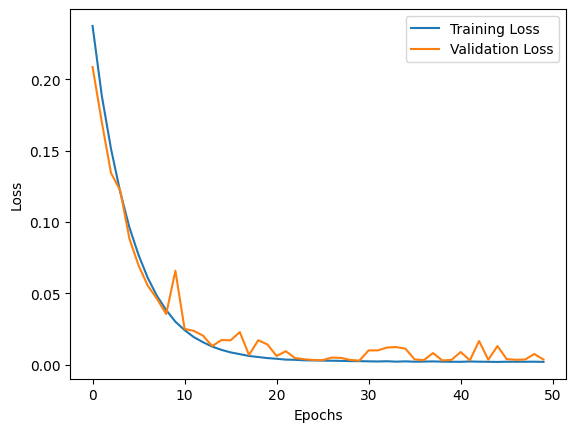

In [10]:

# Evaluate the model with additional metrics
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test MAE: {mae}')

# Visualize training history
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

84/84 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step


In [13]:
# Ensure both y_train and train_predict have compatible shapes
print(f"y_train shape: {y_train.shape}")
print(f"train_predict shape: {train_predict.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"test_predict shape: {test_predict.shape}")

y_train shape: (2676,)
train_predict shape: (2676, 1)
y_test shape: (594,)
test_predict shape: (594, 1)


In [14]:
# Inverse transform the predictions to get actual stock prices
train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])

In [15]:
# Model evaluation
from sklearn.metrics import mean_squared_error
train_rmse = np.sqrt(mean_squared_error(y_train[0], train_predict[:, 0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], test_predict[:, 0]))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

Train RMSE: 32.52769535514043
Test RMSE: 68.28211981786619


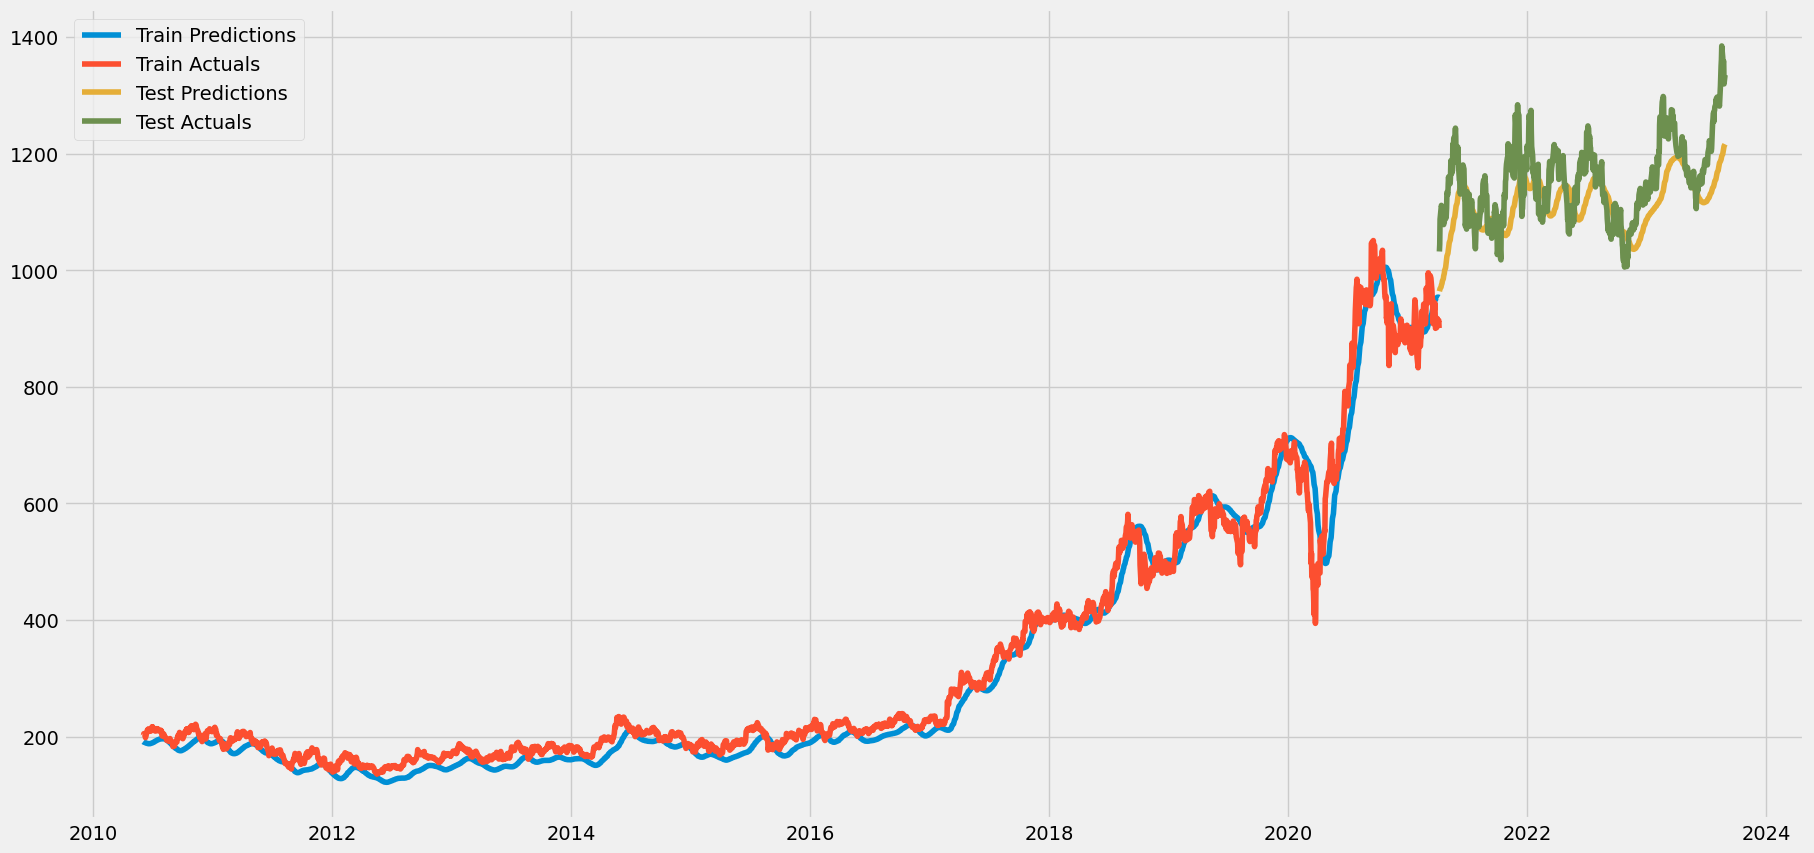

In [16]:
# Visualize the results
plt.style.use('fivethirtyeight')
# Plot the data
plt.figure(figsize=(20, 10))

# Plot training predictions and actuals
plt.plot(stock_data.index[time_step+1:time_step+len(train_predict)+1], train_predict, label='Train Predictions')
plt.plot(stock_data.index[time_step+1:time_step+len(train_predict)+1], y_train[0], label='Train Actuals')

# Plot testing predictions and actuals
test_index = stock_data.index[time_step+len(train_predict)+1:time_step+len(train_predict)+1+len(test_predict)]
plt.plot(test_index, test_predict, label='Test Predictions')
plt.plot(test_index[:len(test_predict)], y_test[0][:len(test_predict)], label='Test Actuals')

plt.legend()
plt.show()


In [17]:
# Extend predictions for the next 10 days
future_time_steps = 10
future_predictions = []

In [18]:
# Use the last sequence from the testing data to start predicting the future
last_sequence = X_test[-1]

for i in range(future_time_steps):
    # Predict the next price
    next_prediction = model.predict(np.array([last_sequence]))[0, 0]

    # Append the prediction to the list of future predictions
    future_predictions.append(next_prediction)

    # Update the last sequence with the new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [19]:

# Inverse transform the future predictions to get the actual stock prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [20]:

# Get the last date in the original dataset
last_date = stock_data.index[-1]

# Generate dates for the next 10 days
next_dates = pd.date_range(start=last_date, periods=future_time_steps + 1)[1:]  # Skip the last date

In [21]:
 #Print the predicted prices for the next 10 days along with dates
print("Predicted prices for the next 10 days:")
for date, prediction in zip(next_dates, future_predictions):
    print(f"{date.strftime('%Y-%m-%d')}: {prediction[0]:.2f}")

Predicted prices for the next 10 days:
2024-01-26: 1216.13
2024-01-27: 1219.40
2024-01-28: 1222.31
2024-01-29: 1224.74
2024-01-30: 1226.63
2024-01-31: 1227.92
2024-02-01: 1228.61
2024-02-02: 1228.72
2024-02-03: 1228.28
2024-02-04: 1227.34


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━

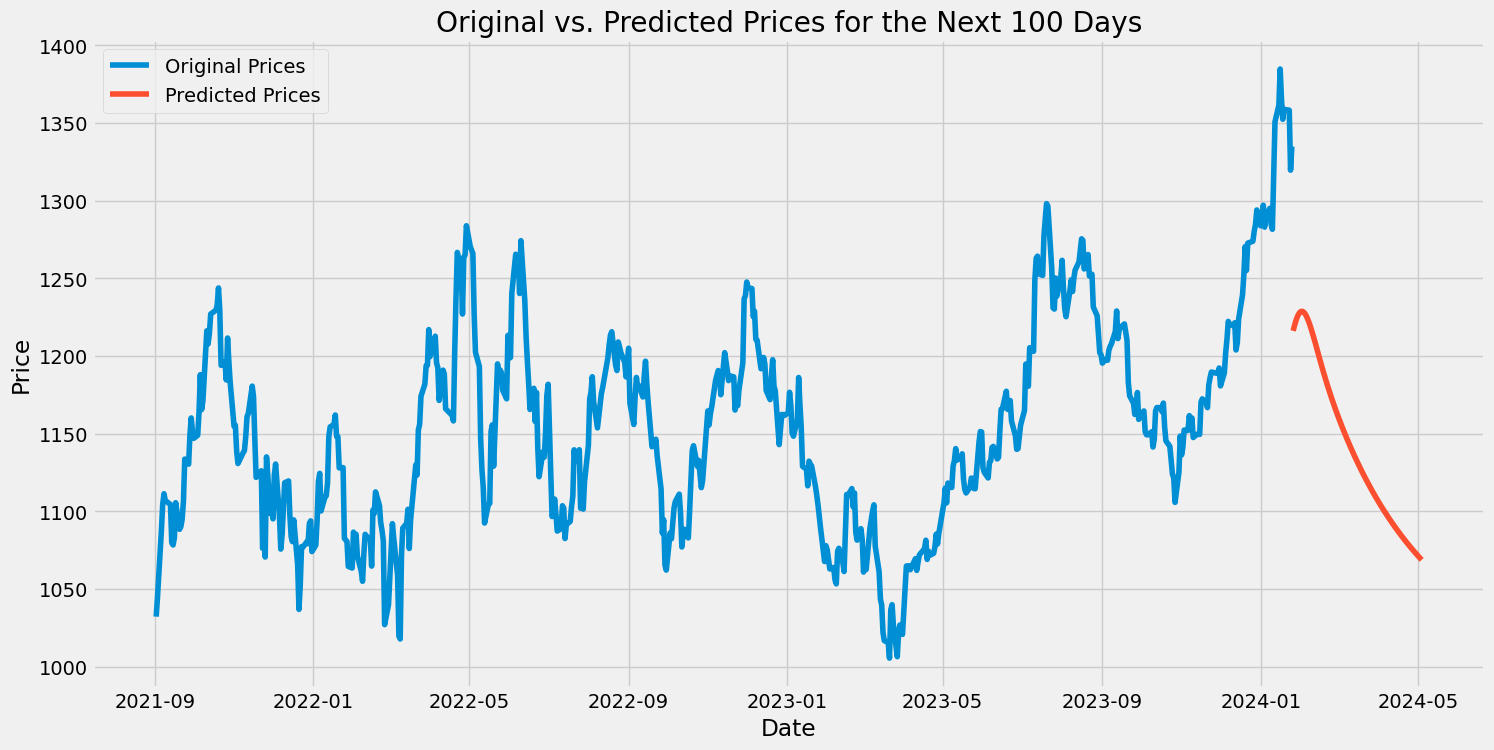

In [22]:
# Extend predictions for the next 100 days
future_time_steps = 100
future_predictions = []

# Use the last sequence from the testing data to start predicting the future
last_sequence = X_test[-1]

for i in range(future_time_steps):
    # Predict the next price
    next_prediction = model.predict(np.array([last_sequence]))[0, 0]

    # Append the prediction to the list of future predictions
    future_predictions.append(next_prediction)

    # Update the last sequence with the new prediction
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = next_prediction

# Inverse transform the future predictions to get the actual stock prices
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate dates for the next 100 days
next_dates = pd.date_range(start=last_date, periods=future_time_steps + 1)[1:]  # Skip the last date

# Plot the original and predicted prices for the next 100 days
plt.figure(figsize=(16, 8))
plt.plot(stock_data.index[-len(y_test[0]):], y_test[0], label='Original Prices')
plt.plot(next_dates, future_predictions, label='Predicted Prices')
plt.title('Original vs. Predicted Prices for the Next 100 Days')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [24]:
print("Predicted prices for the next 100 days:")
for date, prediction in zip(next_dates, future_predictions):
    print(f"{date.strftime('%Y-%m-%d')}: {prediction[0]:.2f}")

Predicted prices for the next 100 days:
2024-01-26: 1216.13
2024-01-27: 1219.40
2024-01-28: 1222.31
2024-01-29: 1224.74
2024-01-30: 1226.63
2024-01-31: 1227.92
2024-02-01: 1228.61
2024-02-02: 1228.72
2024-02-03: 1228.28
2024-02-04: 1227.34
2024-02-05: 1225.94
2024-02-06: 1224.16
2024-02-07: 1222.05
2024-02-08: 1219.66
2024-02-09: 1217.06
2024-02-10: 1214.30
2024-02-11: 1211.42
2024-02-12: 1208.46
2024-02-13: 1205.46
2024-02-14: 1202.44
2024-02-15: 1199.43
2024-02-16: 1196.44
2024-02-17: 1193.49
2024-02-18: 1190.59
2024-02-19: 1187.74
2024-02-20: 1184.95
2024-02-21: 1182.22
2024-02-22: 1179.56
2024-02-23: 1176.95
2024-02-24: 1174.41
2024-02-25: 1171.92
2024-02-26: 1169.48
2024-02-27: 1167.10
2024-02-28: 1164.77
2024-02-29: 1162.49
2024-03-01: 1160.24
2024-03-02: 1158.04
2024-03-03: 1155.88
2024-03-04: 1153.76
2024-03-05: 1151.67
2024-03-06: 1149.62
2024-03-07: 1147.60
2024-03-08: 1145.61
2024-03-09: 1143.66
2024-03-10: 1141.73
2024-03-11: 1139.83
2024-03-12: 1137.96
2024-03-13: 1136.12
